### Prerequisites:
- Run xdpyinfo | grep dimensions

### Inputs:
- Display size, can be obtained by running: xdpyinfo | grep dimensions

In [1]:
DISPLAY_SIZE = (1440, 878)
ENV = 'MountainCarContinuous-v0'
RANDOM_SEED = 101
CLASSES_DIR = '../classes'

In [2]:
import gym
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.autograd import Variable

!python -m pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=DISPLAY_SIZE)
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import sys
sys.path.insert(0, CLASSES_DIR)
from models import Agent_Model
from Agents import RandomSearchAgent

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

env = gym.make(ENV)
env.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [5]:
model = Agent_Model(env, device).to(device)

In [6]:
randomAgent = RandomSearchAgent(model)

In [7]:
randomAgent.train_model()

Episode 10	Average Score: -57.05
Episode 20	Average Score: -29.67
Episode 30	Average Score: -20.54
Episode 40	Average Score: -15.97
Episode 50	Average Score: -13.23
Episode 60	Average Score: -11.41
Episode 70	Average Score: -10.10
Episode 80	Average Score: -9.12
Episode 90	Average Score: -8.36
Episode 100	Average Score: -0.20
Episode 110	Average Score: 11.78
Episode 120	Average Score: 18.10
Episode 130	Average Score: 23.35
Episode 140	Average Score: 29.63
Episode 150	Average Score: 38.40
Episode 160	Average Score: 46.93
Episode 170	Average Score: 54.31
Episode 180	Average Score: 61.80
Episode 190	Average Score: 70.49
Episode 200	Average Score: 69.34
Episode 210	Average Score: 68.22
Episode 220	Average Score: 69.19
Episode 230	Average Score: 70.45
Episode 240	Average Score: 71.67
Episode 250	Average Score: 69.45
Episode 260	Average Score: 69.61
Episode 270	Average Score: 67.70
Episode 280	Average Score: 67.47
Episode 290	Average Score: 67.53
Episode 300	Average Score: 69.65
Episode 310	

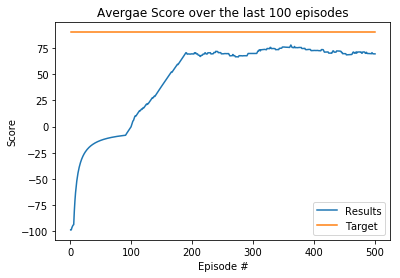

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(randomAgent.scores)+1), randomAgent.scores, label='Results')
plt.plot(np.arange(1, len(randomAgent.scores)+1), np.full(500, 90), label='Target')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Avergae Score over the last 100 episodes')
plt.legend()
plt.show()